In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

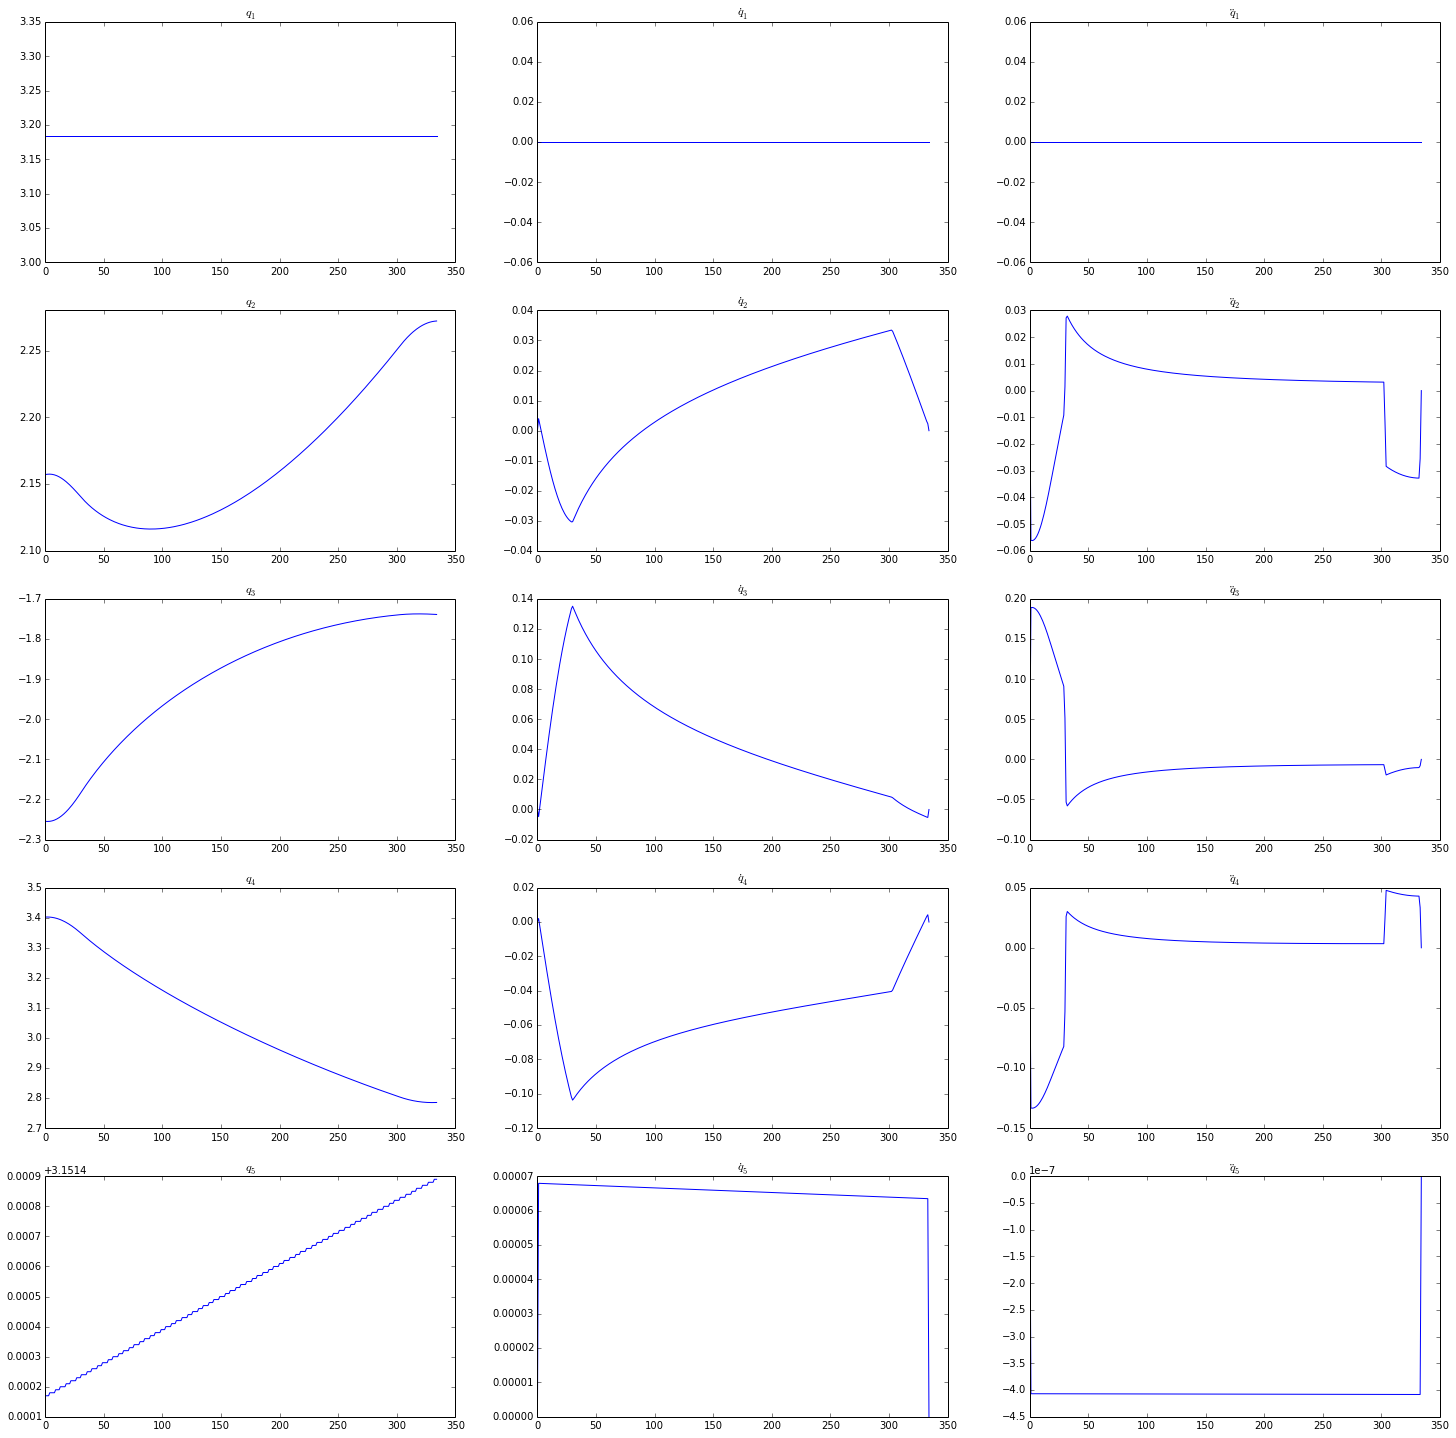

In [17]:
jointSpaceTrajectoryFile = "../trajectory_generator/logs/JointSpaceTraj.log"
jSTFile = open(jointSpaceTrajectoryFile, "r")
jSTData = []

lines = jSTFile.read().split('\n')
arrayLength = len(lines[0].split('\t'))
miss = 0;
for line in lines:
    data = line.split('\t')
    if len(data) != arrayLength:
        miss = miss + 1
        continue
    jSTData.append(map(float, data))
jSTData = np.array(jSTData).T
q = jSTData[0:5]
dq = jSTData[5:10]
ddq = jSTData[10:15]
X = jSTData[15:18]
t = jSTData[18]

jointSpaceFig = plt.figure(1, figsize=(25, 25))

for i in range(5):
    plt.subplot(5, 3, i*3 + 1)
    plt.title("$q_" + str(i + 1) + "$")
    plt.plot(q[i])
    
    plt.subplot(5, 3, i*3 + 2)
    plt.title("$\dot{q}_" + str(i + 1) + "$")
    plt.plot(dq[i])
    
    plt.subplot(5, 3, i*3 + 3)
    plt.title("$\ddot{q}_" + str(i + 1) + "$")
    plt.plot(ddq[i])
plt.show()

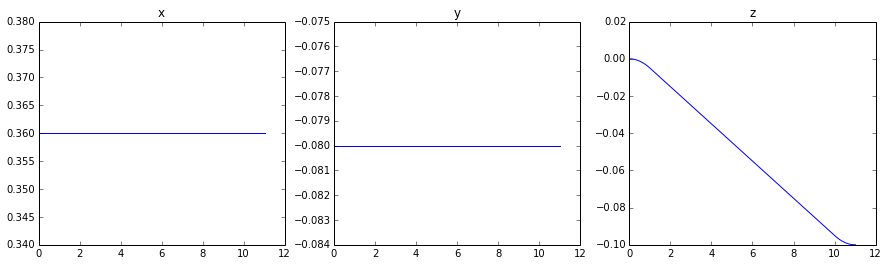

In [18]:
workSpaceFig = plt.figure(2, figsize=(15, 4))
plt.subplot(131)
plt.title("x")
plt.plot(t, X[0])
plt.subplot(132)
plt.title("y")
plt.plot(t, X[1])
plt.subplot(133)
plt.title("z")
plt.plot(t, X[2])
plt.show()

In [24]:
jointPdf = PdfPages('JointSpaceTraj.pdf')
jointPdf.savefig(jointSpaceFig)
jointPdf.close()

In [20]:
certesianPdf = PdfPages('WorkSpaceTraj.pdf')
certesianPdf.savefig(workSpaceFig)
certesianPdf.close()